In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
import h5py
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline
print(tf.keras.__version__)
print(K.tensorflow_backend._get_available_gpus())

2.1.6-tf
[]


In [5]:
# open the dataset
with h5py.File('simple_clock.hdf5', 'r') as f:
    x = f['training_input_grayscale'][:]
    y = f['output_labels'][:,1]
 
x = x.reshape(720, 65, 62, 1)
y = y.reshape(720, 1)

In [6]:
#normalizing the data
x = x/255
y = y/360

In [7]:
#train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

print(x.shape)
print(y.shape)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(720, 65, 62, 1)
(720, 1)
(612, 65, 62, 1)
(612, 1)
(108, 65, 62, 1)
(108, 1)


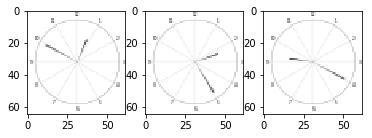

In [8]:
#visualizing some examples
f, axarr = plt.subplots(1,3)

axarr[0].imshow(x[50].reshape(65,62), cmap='gray', vmin=0, vmax=1)
axarr[1].imshow(x[145].reshape(65,62), cmap='gray', vmin=0, vmax=1)
axarr[2].imshow(x[560].reshape(65,62), cmap='gray', vmin=0, vmax=1)

In [9]:
#Convolutional Neural Network implementation

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(60, (3,3), activation='relu', input_shape=(65,62,1)),
  tf.keras.layers.Conv2D(20, (3,3), activation='relu'),
  #tf.keras.layers.MaxPooling2D(2, 2),
  #tf.keras.layers.Conv2D(20, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  #tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1, activation='relu')
])
model.compile(optimizer='sgd', loss='mean_absolute_error')
model.summary()
model.fit(x_train, y_train, epochs=20)
test_loss = model.evaluate(x_test, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 63, 60, 60)        600       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 58, 20)        10820     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 29, 20)        0         
_________________________________________________________________
flatten (Flatten)            (None, 17400)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1113664   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total para

In [ ]:
# model.save('first_model.h5py')
plt.imshow(x[50].reshape(65,62), cmap='gray', vmin=0, vmax=1)

print(y[50])
preds = model.predict(x)
print(preds[50])

In [ ]:
print(y[470])
print(preds[470])
print(y[100])
print(preds[100])
print(y[50])
print(preds[50])

Das Modell gibt immer einen Wert um die 150° aus :(